<a href="https://colab.research.google.com/github/EstebanSRO/Class02/blob/main/proyecto_mineria_0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#Establececemos conexion con el documento
Path = '/content/drive/MyDrive/Proyecto Final Mineria/Challenge_4y5.csv' 

In [44]:
#Importamos todas las librerias que nos pueden ser de utilidad
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy import stats
from sklearn.cluster import KMeans

# hi


hi [google.com](hi)

In [45]:
#Visualizamos la estructura de la base de datos
df = pd.read_csv(Path)
df

,Cliente,Producto,sem44,sem43,sem42,sem41
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000
...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000


descripcion de base de datos 

In [46]:
#Visualizamos como esta compuestas las columnas
df.columns

Index(['Cliente', 'Producto', 'sem44', 'sem43', 'sem42', 'sem41'], dtype='object')

In [47]:
#Establecemos la tabla pivote para hacer la suma de los productos individualmente hablando entre las semanas
pd.pivot_table(df,
               index = 'Producto',
               values= ['sem41', 'sem42','sem43','sem44'],
               aggfunc='sum')

,sem41,sem42,sem43,sem44
Producto,,,,
AGUA MINERAL FAMILIAR,1.092228e+04,1.397317e+04,9.526771e+03,1.094305e+04
AGUA MINERAL INDIVIDUAL,4.251492e+04,5.261202e+04,3.735241e+04,4.003465e+04
AGUA PURIFICADA FAMILIAR,4.103125e+04,5.524482e+04,3.574399e+04,4.001780e+04
AGUA PURIFICADA INDIVIDUAL,1.425923e+05,1.753409e+05,1.371395e+05,1.506353e+05
AGUA SABORIZADA INDIVIDUAL,1.122844e+04,1.300321e+04,9.834489e+03,9.628852e+03
BEBIDAS DE SOYA FAMILIAR,1.482241e+03,1.741637e+03,1.394109e+03,1.493569e+03
BEBIDAS DE SOYA INDIVIDUAL,7.329618e+02,1.505939e+03,1.421822e+03,1.188949e+03
BEBIDAS ENERGETICAS,4.019007e+03,3.918420e+03,2.953686e+03,3.355613e+03
BEBIDAS INFANTILES,1.116572e+04,1.301318e+04,9.857453e+03,1.106790e+04


In [48]:
#Si queremos agregar una columna adicional que contenga la clasificación de cada producto, primero debemos crear una lista con la clasificación correspondiente para cada producto. 
#Y para ello, Ordenamos todos los productos como categorias para poder establecer la canibalización posteriormente hablando
categorias = {
    'Agua': ['AGUA MINERAL FAMILIAR', 'AGUA MINERAL INDIVIDUAL', 'AGUA PURIFICADA FAMILIAR',
             'AGUA PURIFICADA INDIVIDUAL', 'AGUA SABORIZADA INDIVIDUAL'],
    'Bebidas': ['BEBIDAS DE SOYA FAMILIAR', 'BEBIDAS DE SOYA INDIVIDUAL', 'BEBIDAS ENERGETICAS',
                'BEBIDAS INFANTILES', 'BEBIDAS REFRESCANTES'],
    'Cocas': ['COLAS LIGHT FAMILIAR', 'COLAS LIGHT INDIVIDUAL', 'COLAS REGULAR FAMILIAR NO RETORNABLE',
              'COLAS REGULAR FAMILIAR RETORNABLE', 'COLAS REGULAR INDIVIDUAL NO RETORNABLE',
              'COLAS REGULAR INDIVIDUAL RETORNABLE'],
    'Isotónicos': ['ISOTONICOS'],
    'Jugos': ['JUGOS Y NECTARES HOGAR', 'NARANJADAS'],
    'Leche': ['LECHE UHT ESPECIALIZADA', 'LECHE UHT REGULAR', 'LECHE UHT SABORIZADA'],
    'Refrescos': ['SABORES REGULAR FAMILIAR NO RETORNABLE', 'SABORES REGULAR FAMILIAR RETORNABLE',
                  'SABORES REGULAR INDIVIDUAL NO RETORNABLE', 'SABORES REGULAR INDIVIDUAL RETORNABLE'],
    'Te': ['TE']
}

In [49]:
#Recorrimos cada categoría del diccionario categorias anteriormente establecido para:
#Permitir asignar a cada producto de la base de datos la categoría correspondiente utilizando la lógica definido. 
#verificar si el producto x está en la lista de productos de esa categoría. 
#Si lo encuentra, retorna el nombre de la categoría. Si no encuentra ninguna coincidencia, retorna "Otro".
def custom_cs(x):
    for cat, prods in categorias.items():
        if x in prods:
            return cat
    

In [50]:
#La funcion append() nos ayuda para agregar la fila a la base de datos
#El parametro ignore_index=True es para que la nueva fila se agregue al final de la base de datos y se le asigne un nuevo índice numérico en lugar de usar uno existente.
df = df.append(categorias, ignore_index=True)

In [51]:
#La función custom_cs nos ayuda a tomar cada elemento de la columna "producto" y lo clasifica según las categorías definidas en categorias. 
#La función map aplica a cada elemento de la columna "producto" y devuelve una serie con la categoría correspondiente a cada de ellas.
clasificacion = df['Producto'].map(custom_cs)

In [52]:
#Asignamos la serie clasificacion como una nueva columna llamada 'clasificacion' en un DataFrame df.
df['clasificacion'] = clasificacion

In [53]:
#Por fin, queda listo nuestra pivot_table donde trabajaremos ahora en adelante con estos datos estructurados.
pd.pivot_table(df,
               index = ['Producto','clasificacion'],
               values= ['sem41', 'sem42','sem43','sem44'],
               aggfunc='sum')

,,sem41,sem42,sem43,sem44
Producto,clasificacion,,,,
AGUA MINERAL FAMILIAR,Agua,1.092228e+04,1.397317e+04,9.526771e+03,1.094305e+04
AGUA MINERAL INDIVIDUAL,Agua,4.251492e+04,5.261202e+04,3.735241e+04,4.003465e+04
AGUA PURIFICADA FAMILIAR,Agua,4.103125e+04,5.524482e+04,3.574399e+04,4.001780e+04
AGUA PURIFICADA INDIVIDUAL,Agua,1.425923e+05,1.753409e+05,1.371395e+05,1.506353e+05
AGUA SABORIZADA INDIVIDUAL,Agua,1.122844e+04,1.300321e+04,9.834489e+03,9.628852e+03
BEBIDAS DE SOYA FAMILIAR,Bebidas,1.482241e+03,1.741637e+03,1.394109e+03,1.493569e+03
BEBIDAS DE SOYA INDIVIDUAL,Bebidas,7.329618e+02,1.505939e+03,1.421822e+03,1.188949e+03
BEBIDAS ENERGETICAS,Bebidas,4.019007e+03,3.918420e+03,2.953686e+03,3.355613e+03
BEBIDAS INFANTILES,Bebidas,1.116572e+04,1.301318e+04,9.857453e+03,1.106790e+04


In [54]:
#Definimos Pv
Pv = pd.pivot_table(df,
                       index=['Producto', 'clasificacion'],
                       values=['sem41', 'sem42', 'sem43', 'sem44'],
                       aggfunc='sum')
# Calcula las métricas de ventas canabalizadas, ventas de transferencias, tasa de canibalizacion y Tasa de transferencia
Pv['Total ventas'] = Pv.sum(axis=1)
Pv['Ventas canibalizadas'] = Pv.groupby('clasificacion')['Total ventas'].apply(lambda x: x - x.shift(1, fill_value=0))
Pv['Ventas transferidas'] = Pv.groupby('clasificacion')['Total ventas'].apply(lambda x: x.shift(-1, fill_value=0) - x)
Pv['Tasa de canibalización'] = Pv['Ventas canibalizadas'] / Pv['Total ventas'].shift(1, fill_value=0)
Pv['Tasa de transferencia'] = Pv['Ventas transferidas'] / Pv['Total ventas']


In [55]:
# Tabla pivot con métricas calculadas
tabla_pivot = pd.pivot_table(df,
               index = ['Producto','clasificacion'],
               values= ['sem41', 'sem42','sem43','sem44'],
               aggfunc='sum')

# Calcula las métricas de canibalización y transferencia
canibalizacion = tabla_pivot.apply(lambda row: row / row.sum(), axis=1)
transferencia = tabla_pivot.apply(lambda col: col / col.sum(), axis=0)

# Imprime las tablas de métricas
print("Tasa de canibalización:")
display(canibalizacion.style.format("{:.2%}"))

print("Tasa de transferencia:")
display(transferencia.style.format("{:.2%}"))



Tasa de canibalización:


,,sem41,sem42,sem43,sem44
Producto,clasificacion,,,,
AGUA MINERAL FAMILIAR,Agua,24.08%,30.80%,21.00%,24.12%
AGUA MINERAL INDIVIDUAL,Agua,24.64%,30.50%,21.65%,23.21%
AGUA PURIFICADA FAMILIAR,Agua,23.85%,32.11%,20.78%,23.26%
AGUA PURIFICADA INDIVIDUAL,Agua,23.54%,28.95%,22.64%,24.87%
AGUA SABORIZADA INDIVIDUAL,Agua,25.70%,29.76%,22.51%,22.04%
BEBIDAS DE SOYA FAMILIAR,Bebidas,24.25%,28.50%,22.81%,24.44%
BEBIDAS DE SOYA INDIVIDUAL,Bebidas,15.11%,31.05%,29.32%,24.52%
BEBIDAS ENERGETICAS,Bebidas,28.21%,27.50%,20.73%,23.55%
BEBIDAS INFANTILES,Bebidas,24.76%,28.85%,21.85%,24.54%


Tasa de transferencia:


,,sem41,sem42,sem43,sem44
Producto,clasificacion,,,,
AGUA MINERAL FAMILIAR,Agua,0.26%,0.27%,0.26%,0.26%
AGUA MINERAL INDIVIDUAL,Agua,1.02%,1.02%,1.02%,0.95%
AGUA PURIFICADA FAMILIAR,Agua,0.99%,1.07%,0.97%,0.95%
AGUA PURIFICADA INDIVIDUAL,Agua,3.44%,3.41%,3.73%,3.58%
AGUA SABORIZADA INDIVIDUAL,Agua,0.27%,0.25%,0.27%,0.23%
BEBIDAS DE SOYA FAMILIAR,Bebidas,0.04%,0.03%,0.04%,0.04%
BEBIDAS DE SOYA INDIVIDUAL,Bebidas,0.02%,0.03%,0.04%,0.03%
BEBIDAS ENERGETICAS,Bebidas,0.10%,0.08%,0.08%,0.08%
BEBIDAS INFANTILES,Bebidas,0.27%,0.25%,0.27%,0.26%


In [56]:
# Tabla pivot con métricas calculadas y agrupada por clasificación
tabla_pivot = pd.pivot_table(df,
                             index=['clasificacion', 'Producto'],
                             values=['sem41', 'sem42', 'sem43', 'sem44'],
                             aggfunc='sum')

# Calcula las métricas de canibalización y transferencia
canibalizacion = tabla_pivot.apply(lambda row: row / row.sum(), axis=1)
transferencia = tabla_pivot.apply(lambda col: col / col.sum(), axis=0)

# Imprime las tablas de métricas
print("Tasa de canibalización:")
display(canibalizacion.style.format("{:.2%}"))

print("Tasa de transferencia:")
display(transferencia.style.format("{:.2%}"))


Tasa de canibalización:


Tasa de transferencia:


In [57]:
# Tabla pivot con métricas calculadas y agrupada por clasificación
tabla_pivot = pd.pivot_table(df,
                             index=['clasificacion'],
                             values=['sem41', 'sem42', 'sem43', 'sem44'],
                             aggfunc='sum')

# Calcula las métricas de canibalización y transferencia
canibalizacion = tabla_pivot.apply(lambda row: row / row.sum(), axis=1)
transferencia = tabla_pivot.apply(lambda col: col / col.sum(), axis=0)

# Imprime las tablas de métricas
print("Tasa de canibalización:")
display(canibalizacion.style.format("{:.2%}"))

print("Tasa de transferencia:")
display(transferencia.style.format("{:.2%}"))

Tasa de canibalización:


,sem41,sem42,sem43,sem44
clasificacion,,,,
Agua,23.89%,29.84%,22.09%,24.18%
Bebidas,25.31%,29.50%,21.71%,23.48%
Cocas,24.15%,30.04%,21.20%,24.61%
Isotónicos,25.16%,30.71%,21.17%,22.96%
Jugos,24.31%,29.49%,21.76%,24.44%
Leche,19.47%,31.30%,23.26%,25.97%
Refrescos,24.20%,29.70%,21.85%,24.25%
Te,22.08%,27.18%,24.47%,26.28%


Tasa de transferencia:


,sem41,sem42,sem43,sem44
clasificacion,,,,
Agua,5.99%,6.03%,6.24%,5.97%
Bebidas,0.78%,0.73%,0.75%,0.71%
Cocas,71.90%,72.08%,71.19%,72.17%
Isotónicos,1.58%,1.56%,1.50%,1.42%
Jugos,4.56%,4.46%,4.60%,4.52%
Leche,0.41%,0.53%,0.56%,0.54%
Refrescos,14.35%,14.19%,14.61%,14.16%
Te,0.43%,0.43%,0.54%,0.51%


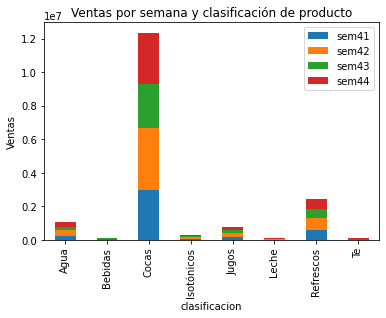

In [58]:
#Gráfico de barras apiladas de las ventas por semana por clasificación de producto.
ax = tabla_pivot.plot(kind='bar', stacked=True)
ax.set_ylabel('Ventas')
ax.set_title('Ventas por semana y clasificación de producto')
plt.show()

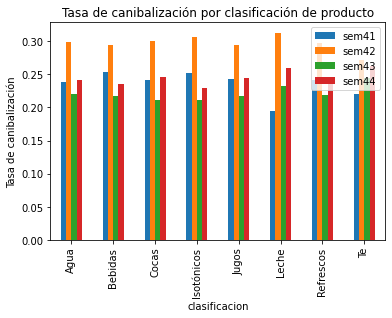

In [59]:
#Gráfico de barras de la tasa de canibalización por clasificación de producto.
ad = canibalizacion.plot(kind='bar')
ad.set_ylabel('Tasa de canibalización')
ad.set_title('Tasa de canibalización por clasificación de producto')
plt.show()

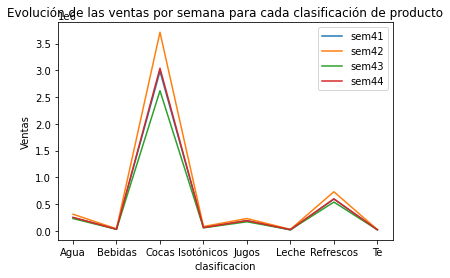

In [60]:
#Gráfico de línea de la evolución de las ventas por semana para cada clasificación de producto.
ap = tabla_pivot.plot(kind='line')
ap.set_ylabel('Ventas')
ap.set_title('Evolución de las ventas por semana para cada clasificación de producto')
plt.show()


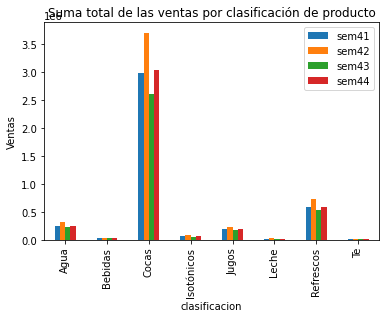

In [61]:
#Gráfico de barras de la suma total de las ventas por clasificación de producto.
ak = tabla_pivot.plot(kind='bar')
ak.set_ylabel('Ventas')
ak.set_title('Suma total de las ventas por clasificación de producto')
plt.show()


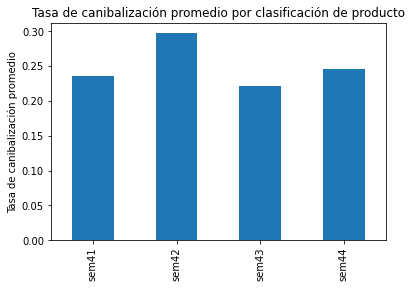

In [62]:
#Gráfico de barras de la tasa de canibalización promedio por clasificación de producto.
ar = canibalizacion.mean().plot(kind='bar')
ar.set_ylabel('Tasa de canibalización promedio')
ar.set_title('Tasa de canibalización promedio por clasificación de producto')
plt.show()


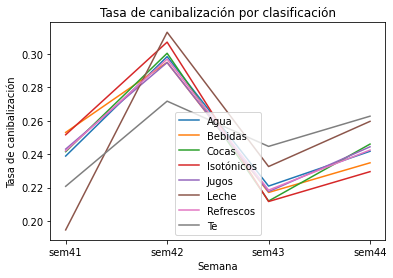

In [63]:
# Crea una figura y un eje
fig, ax = plt.subplots()

# Crea un gráfico de línea para cada clasificación
for clasif in canibalizacion.index:
    ax.plot(canibalizacion.loc[clasif], label=clasif)

# Añade un título y etiquetas de los ejes
ax.set_title("Tasa de canibalización por clasificación")
ax.set_xlabel("Semana")
ax.set_ylabel("Tasa de canibalización")

# Añade una leyenda
ax.legend()

# Muestra el gráfico
plt.show()
